In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体为中文宋体
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})#解决sns乱码问题
data3 = pd.read_csv('datafinal.csv')
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20222 entries, 0 to 20221
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total_Price            20222 non-null  float64
 1   Unit_Price             20222 non-null  object 
 2   Community              20222 non-null  object 
 3   Location               20222 non-null  object 
 4   Layout                 20222 non-null  int64  
 5   Area                   20222 non-null  float64
 6   Orientation            20222 non-null  object 
 7   Decoration             20222 non-null  int64  
 8   Year                   20222 non-null  float64
 9   台楼                     20222 non-null  int64  
 10  Attention              20222 non-null  int64  
 11  Listing_Time           20222 non-null  object 
 12  Transaction_Ownership  20222 non-null  object 
 13  Last_Transaction       20222 non-null  float64
 14  Housing_Purpose        20222 non-null  object 
 15  Ho

In [2]:
# 去除"Unit_Price"列中的逗号，并转换为整数类型
data3['Unit_Price'] = data3['Unit_Price'].str.replace(',', '').astype('int64')

# 将"Year"列转换为int64类型
data3['Year'] = data3['Year'].astype('int64')

In [4]:
data3

,Total_Price,Unit_Price,Community,Location,Layout,Area,Orientation,Decoration,Year,台楼,Attention,Listing_Time,Transaction_Ownership,Last_Transaction,Housing_Purpose,Housing_Age,Property_Ownership,Coordinates
0,364.0,50000,红群楼,地王,14,72.71,南 北,0,1986,8,0,2023-05-16,商品房,1986.000000,普通住宅,满五年,共有,"114.113173,22.554560"
1,358.0,42000,兴业大厦,春风路,18,85.18,东南,3,1984,2,4,2023-05-09,商品房,1984.000000,普通住宅,暂无数据,非共有,"114.119680,22.542570"
2,360.0,48000,大塘垅小区,地王,17,74.88,南,3,1984,8,1,2023-04-28,商品房,1984.000000,普通住宅,满五年,共有,"114.113173,22.554560"
3,258.0,56000,金色都汇,春风路,13,46.00,南,3,2004,10,2,2023-04-26,商品房,2004.000000,普通住宅,暂无数据,非共有,"114.125670,22.540460"
4,316.0,60900,湖滨新村,黄贝岭,13,51.80,南,2,1982,8,0,2023-05-06,商品房,1982.000000,普通住宅,暂无数据,非共有,"114.137855,22.559362"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20217,85.0,23384,承翰半山海,大鹏半岛,10,36.35,南,0,2015,10,0,2023-02-22,商品房,2015.000000,普通住宅,满五年,非共有,"114.412910,22.615492"
20218,115.0,20081,KPR佳兆业广场,大鹏半岛,9,57.27,南,3,2013,10,0,2023-03-19,商品房,2013.000000,商务公寓,满五年,非共有,"114.473784,22.594273"
20219,198.0,27000,KPR佳兆业广场,大鹏半岛,13,73.26,北 南,0,2013,10,0,2023-04-29,商品房,2013.000000,普通住宅,暂无数据,非共有,"114.473784,22.594273"
20220,556.0,30000,PURE33璞岸,大鹏半岛,27,185.19,南 北,1,2006,14,1,2019-10-30,商品房,2006.301425,别墅,暂无数据,非共有,"114.480962,22.601690"


C:\Users\86133\AppData\Local\Temp\ipykernel_24060\753179747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=yearly_transaction_count.index, y=yearly_transaction_count.values, palette='viridis')


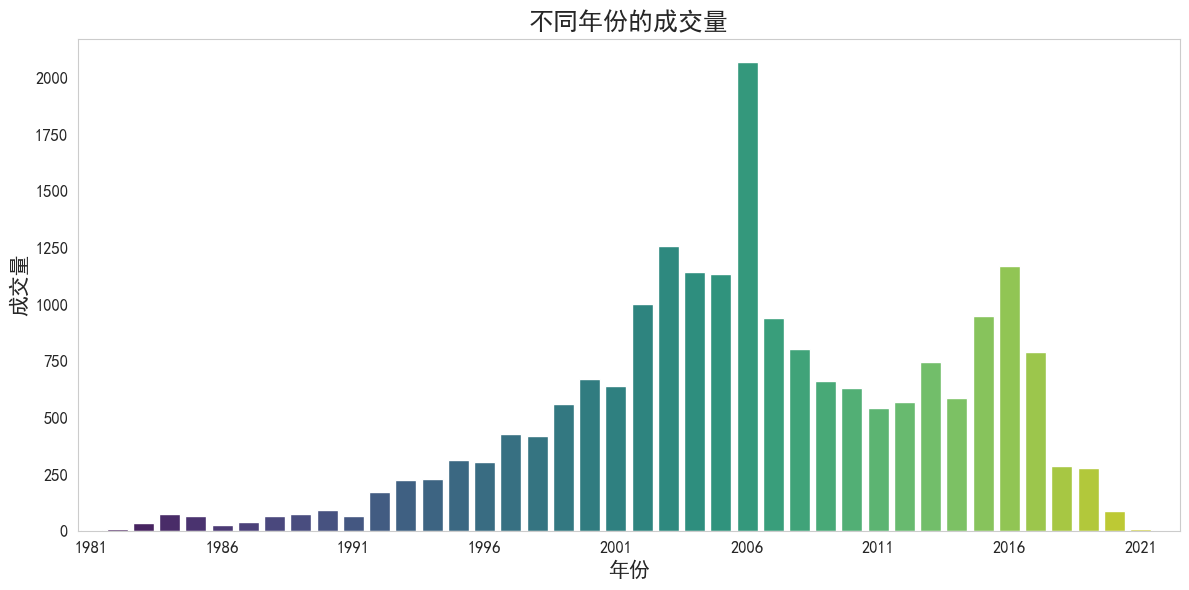

In [38]:
# 统计每个年份的成交量
yearly_transaction_count = data3['Year'].value_counts().sort_index()

# 条形图 - 不同年份的成交量
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=yearly_transaction_count.index, y=yearly_transaction_count.values, palette='viridis')
plt.title('不同年份的成交量', fontsize=18)
plt.xlabel('年份', fontsize=15)
plt.ylabel('成交量', fontsize=15)
plt.xticks(fontsize=12)  # 设置 x 轴刻度标签的字体大小
plt.yticks(fontsize=12)  # 设置 y 轴刻度标签的字体大小
# 选择性显示标签 - 每隔5年一个标签
n = 5
visible_ticks = range(0, len(yearly_transaction_count.index), n)
barplot.set_xticks(visible_ticks)
barplot.yaxis.grid(False)

plt.tight_layout()  # 调整布局，防止标签重叠
plt.show()

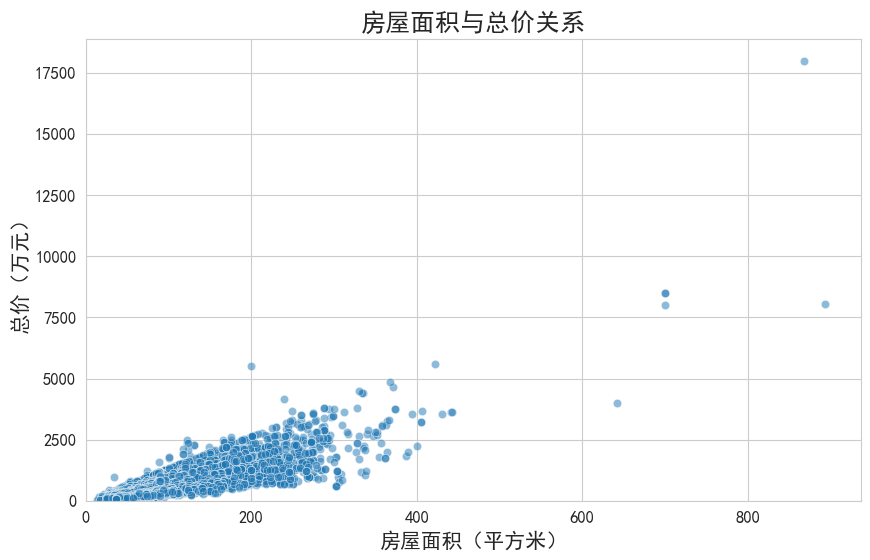

In [28]:
# 可视化房屋面积与总价的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Total_Price', data=data3,alpha=0.5)
plt.title('房屋面积与总价关系',fontsize=18)
plt.xlabel('房屋面积（平方米）', fontsize=15)  # 设置 xlabel 的字体大小
plt.ylabel('总价（万元）', fontsize=15)  # 设置 ylabel 的字体大小
plt.xticks(fontsize=12)  # 设置 x 轴刻度标签的字体大小
plt.yticks(fontsize=12)  # 设置 y 轴刻度标签的字体大小
plt.xlim(left=0)
plt.show()

C:\Users\86133\AppData\Local\Temp\ipykernel_24060\1851750216.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value.index, y=value.values, ax=ax,  palette=colors)


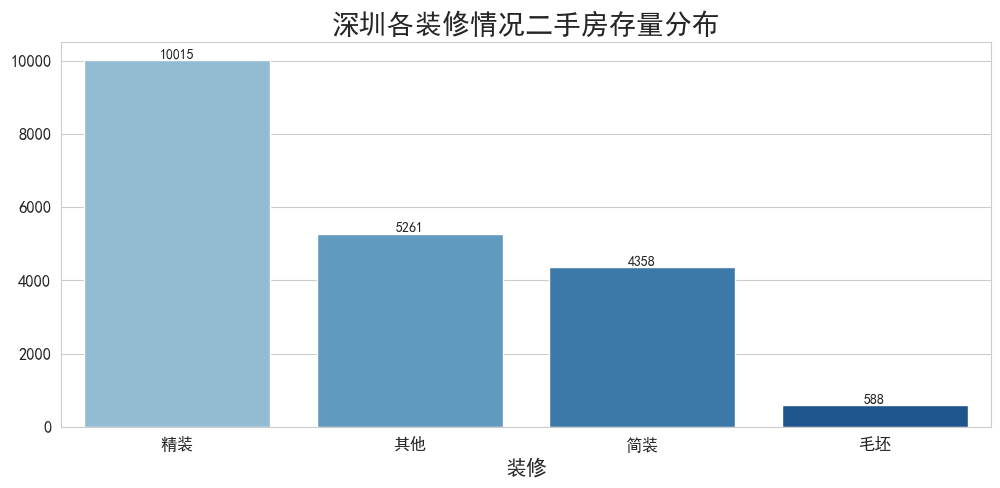

In [29]:
"""查看房屋不同装修情况"""
# 创建颜色列表，以便为每种装修情况设置不同的颜色
colors = sns.color_palette('Blues')[2:]
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
value = data3['Decoration'].value_counts()
# 设置索引为装修情况编码的文字映射
value.index = value.index.map({0: '其他', 1: '毛坯', 2: '简装', 3: '精装'})

# 使用sns.barplot并指定颜色和标签
sns.barplot(x=value.index, y=value.values, ax=ax,  palette=colors)
# 为每个直方图的柱子绘制数值大小
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + (p.get_width() / 2), y=height + 50, s='{:.0f}'.format(height), ha='center')

plt.xlabel('装修', fontsize=15)  # 设置 xlabel 的字体大小
plt.xticks(fontsize=12)  # 设置 x 轴刻度标签的字体大小
plt.yticks(fontsize=12)  # 设置 y 轴刻度标签的字体大小
plt.title('深圳各装修情况二手房存量分布', fontsize=20)
plt.show()

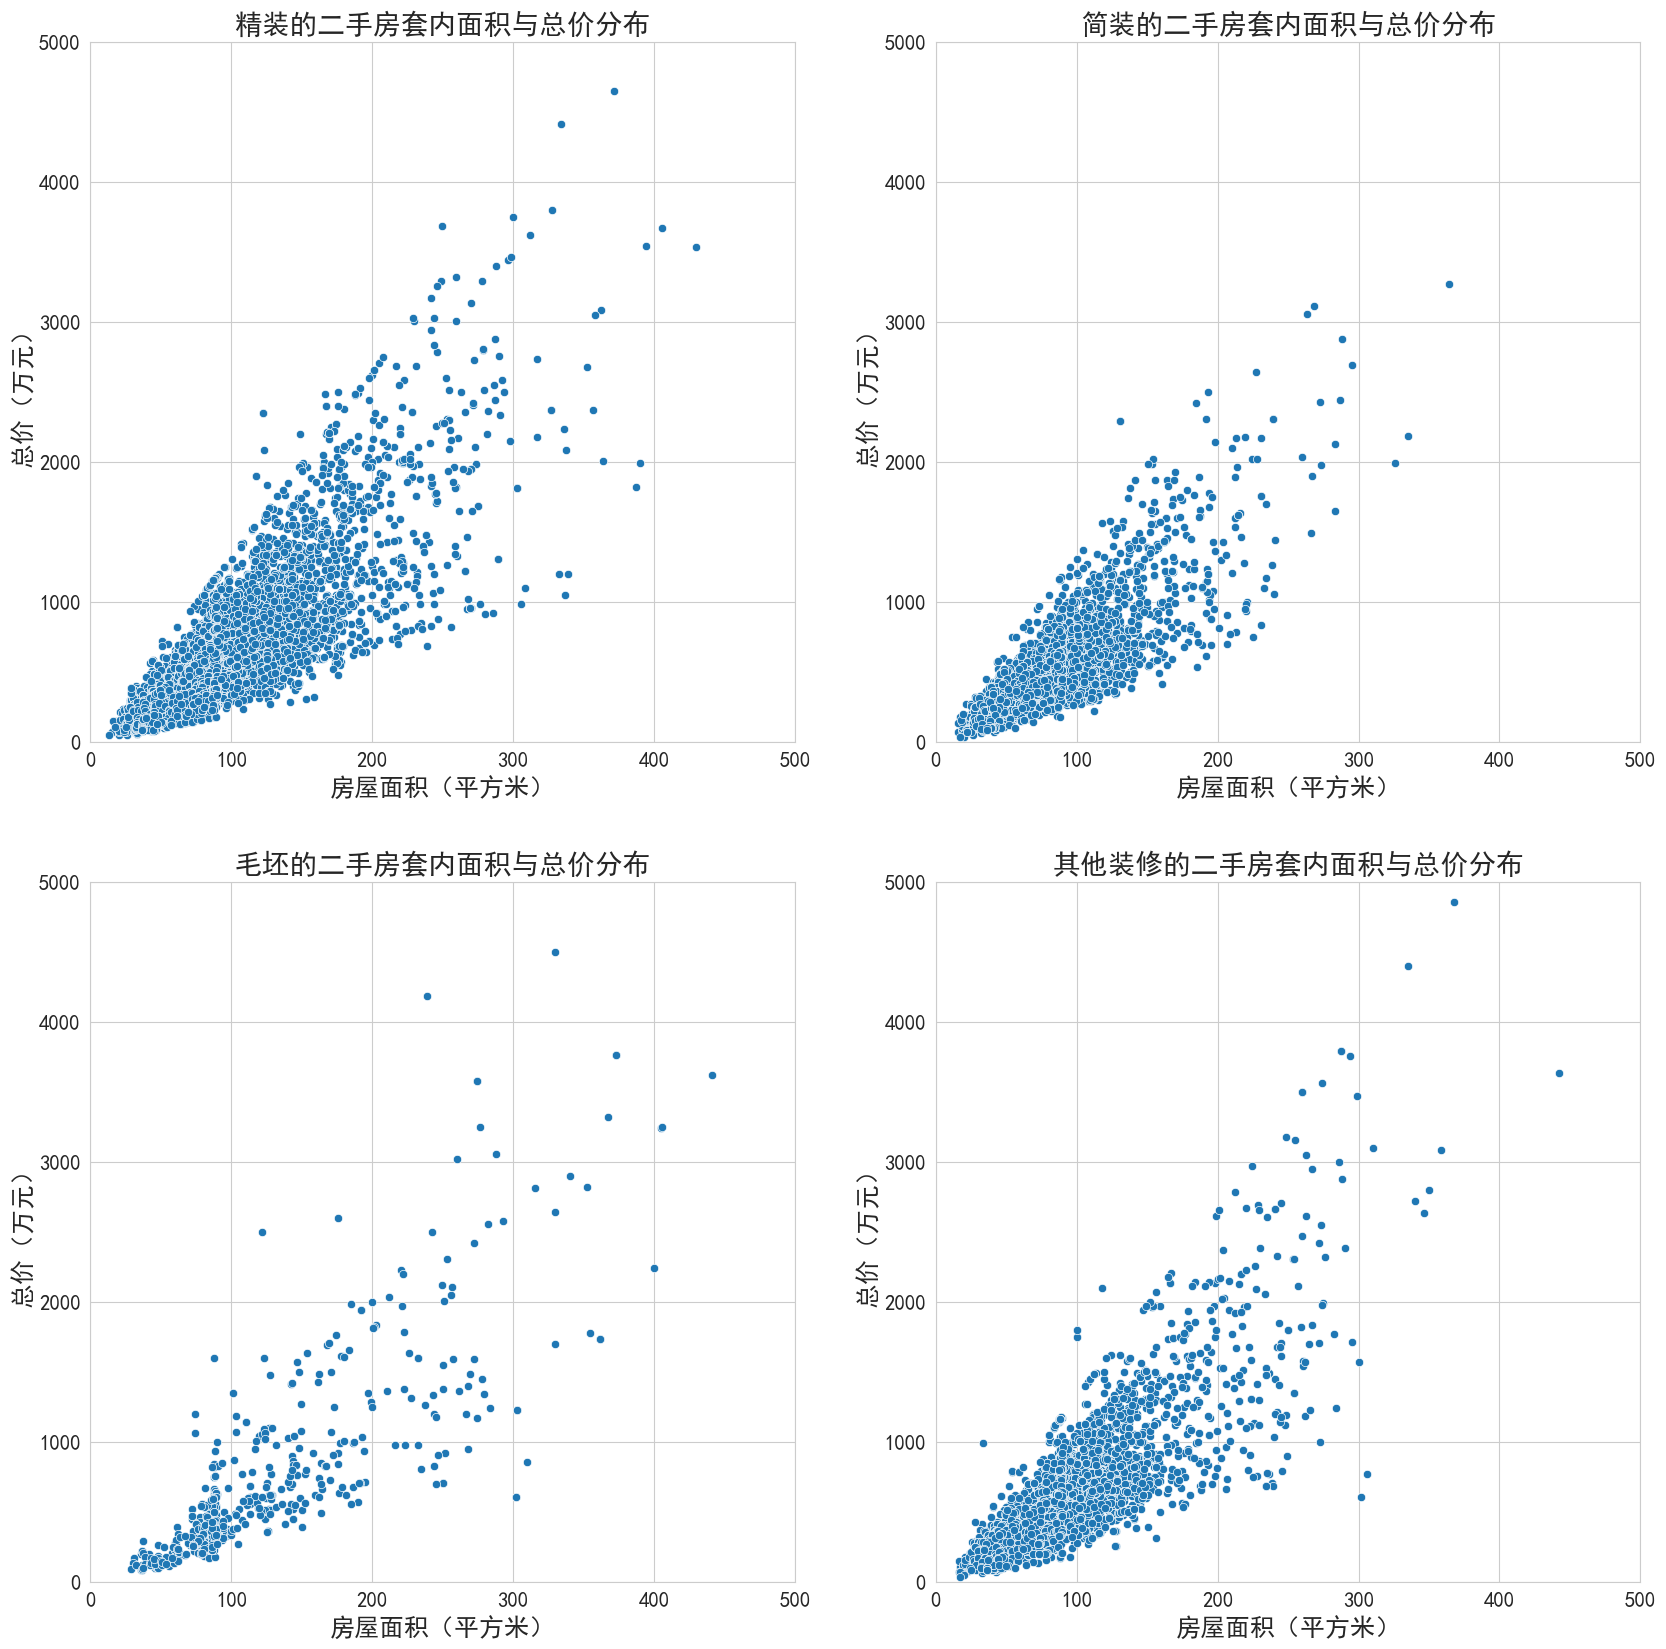

In [32]:
"""不同装修情况的面积与价格分布"""
df_temp_1 = data3.loc[data3['Decoration']==3, :]
df_temp_2 = data3.loc[data3['Decoration']==2, :]
df_temp_3 = data3.loc[data3['Decoration']==1, :]
df_temp_4 = data3.loc[data3['Decoration']==0, :]

fig, ax = plt.subplots(2, 2, figsize=(20,20))
sns.scatterplot(x=df_temp_1['Area'], y=df_temp_1['Total_Price'], ax=ax[0, 0])
sns.scatterplot(x=df_temp_2['Area'], y=df_temp_2['Total_Price'], ax=ax[0, 1])
sns.scatterplot(x=df_temp_3['Area'], y=df_temp_3['Total_Price'], ax=ax[1, 0])
sns.scatterplot(x=df_temp_4['Area'], y=df_temp_4['Total_Price'], ax=ax[1, 1])
ax[0, 0].set_title('精装的二手房套内面积与总价分布', fontsize=20)
ax[0, 1].set_title('简装的二手房套内面积与总价分布', fontsize=20)
ax[1, 0].set_title('毛坯的二手房套内面积与总价分布', fontsize=20)
ax[1, 1].set_title('其他装修的二手房套内面积与总价分布', fontsize=20)
for i in range(2):
    for j in range(2):
        ax[i, j].set_xlim(0, 500)
        ax[i, j].set_ylim(0, 5000)
        ax[i, j].set_xlabel('房屋面积（平方米）', fontsize=18)
        ax[i, j].set_ylabel('总价（万元）', fontsize=18)
        ax[i, j].tick_params(axis='x', labelsize=15)  # 设置x轴刻度标签的字体大小
        ax[i, j].tick_params(axis='y', labelsize=15)  # 设置y轴刻度标签的字体大小
plt.show()

C:\Users\86133\AppData\Local\Temp\ipykernel_24060\3824186023.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value.index, y=value.values, ax=ax, palette=colors)


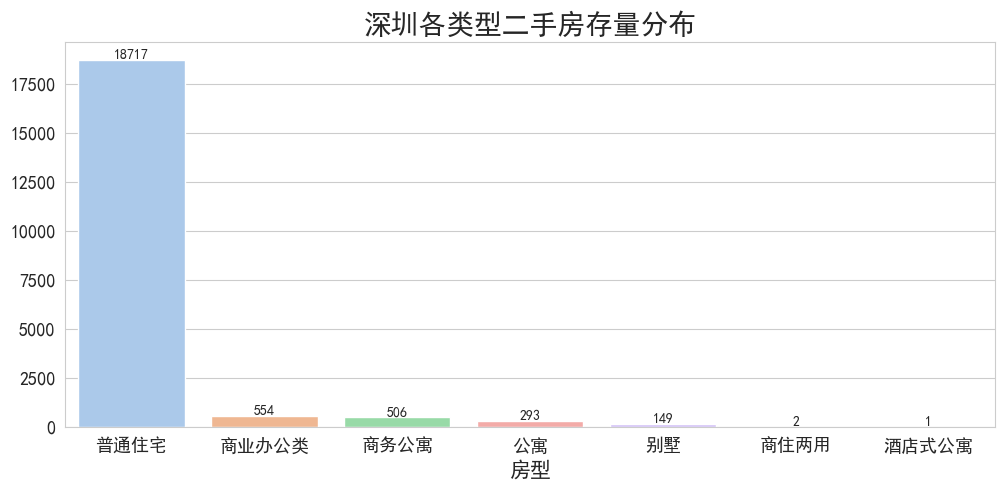

In [34]:
# 使用pastel调色板
colors = sns.color_palette("pastel", len(data3['Housing_Purpose'].unique()))

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
value = data3['Housing_Purpose'].value_counts()

# 使用sns.barplot并指定颜色和标签
sns.barplot(x=value.index, y=value.values, ax=ax, palette=colors)

# 为每个直方图的柱子绘制数值大小
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + (p.get_width() / 2), y=height + 50, s='{:.0f}'.format(height), ha='center')

plt.title('深圳各类型二手房存量分布', fontsize=20)
plt.xlabel('房型', fontsize=15)  # 设置 xlabel 的字体大小
plt.xticks(fontsize=13)  # 设置 x 轴刻度标签的字体大小
plt.yticks(fontsize=13)  # 设置 y 轴刻度标签的字体大小
plt.show()

In [36]:
#转换时间数据为时间戳
from datetime import datetime
data3 = data3[data3['Listing_Time'] != None]
data3 = data3.reset_index(drop=True)
data3['Listing_Time'] = pd.to_datetime(data3['Listing_Time'])
data3['挂牌时间_timestamp'] = data3['Listing_Time'].apply(lambda x: int(datetime.timestamp(x)))

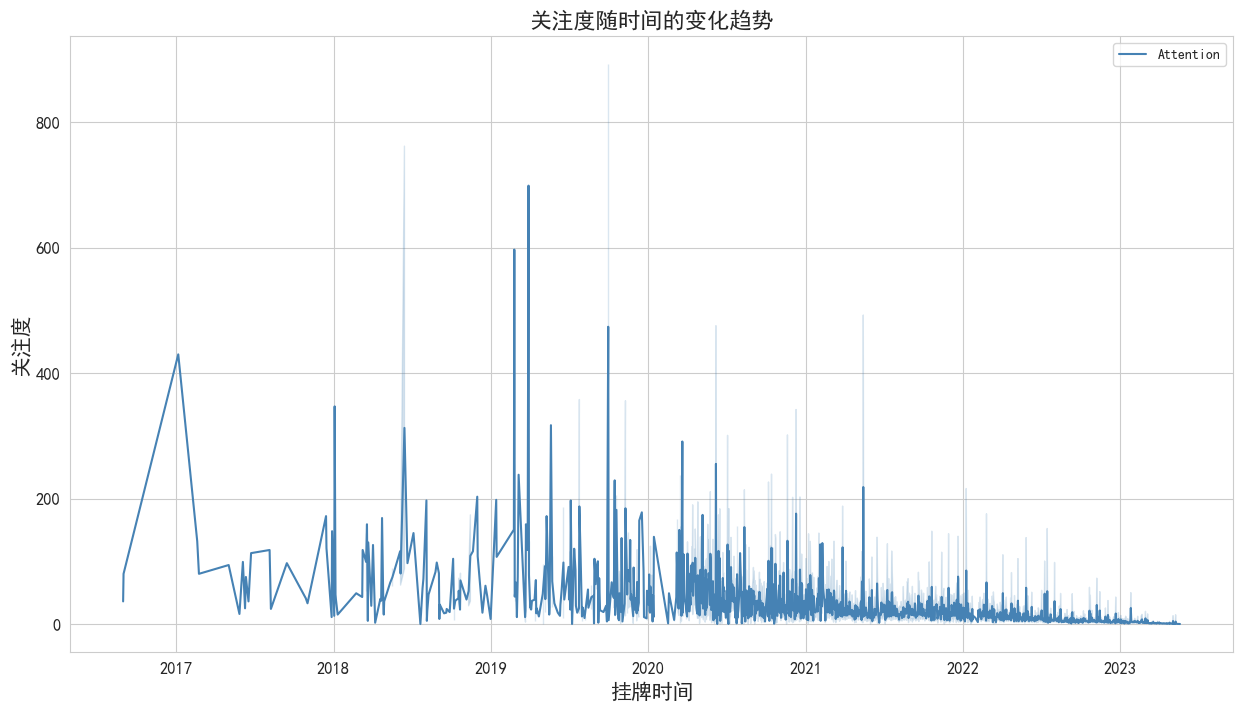

In [37]:
# 设置图形大小
plt.figure(figsize=(15, 8))

# 转换时间戳为日期
data3['Listing_Date'] = pd.to_datetime(data3['挂牌时间_timestamp'], unit='s')

# 绘制 'Attention' 列的折线图
sns.lineplot(x='Listing_Date', y='Attention', data=data3, label='Attention', color='#4682B4')

# 设置标题和标签
plt.title('关注度随时间的变化趋势', fontsize=16)
plt.xlabel('挂牌时间', fontsize=15)  # 设置 xlabel 的字体大小
plt.ylabel('关注度', fontsize=15)  # 设置 ylabel 的字体大小
plt.xticks(fontsize=12)  # 设置 x 轴刻度标签的字体大小
plt.yticks(fontsize=12)  # 设置 y 轴刻度标签的字体大小

# 添加图例
plt.legend()

# 显示图形
plt.show()
#挂牌越晚关注度小？